In [1]:
import pandas as pd
from pathlib import Path

elegida = "unido1.csv"
path = r"C:/Users/jonay/Desktop/Master_IoT/TFM/Callescercanas/Merge"
df_total =  pd.read_csv(Path(path,elegida))
df_total

,fecha,atasco,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,...,intensidad_cSegovia2_2021.csv,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv
0,2021-01-01 00:00:00,0.289102,35,1.0,113,2.0,63,2.0,34,2.0,...,20,0.0,90,1.0,48,1.0,72,1.0,45,1.0
1,2021-01-01 00:15:00,0.302008,25,1.0,133,2.0,56,3.0,38,1.0,...,43,1.0,86,4.0,73,2.0,48,2.0,18,1.0
2,2021-01-01 00:30:00,0.299504,25,1.0,176,4.0,96,3.0,47,2.0,...,60,1.0,133,1.0,132,3.0,96,2.0,33,1.0
3,2021-01-01 00:45:00,0.284883,63,1.0,292,5.0,95,3.0,73,4.0,...,88,1.0,316,4.0,83,2.0,116,3.0,42,1.0
4,2021-01-01 01:00:00,0.290016,53,1.0,280,5.0,64,3.0,67,2.0,...,156,4.0,281,3.0,139,3.0,116,5.0,48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,2021-12-31 22:45:00,0.290016,69,4.0,18,0.0,57,1.0,51,2.0,...,99,3.0,281,5.0,104,3.0,72,2.0,64,1.0
32458,2021-12-31 23:00:00,0.298634,60,2.0,30,0.0,48,1.0,91,4.0,...,92,2.0,204,7.0,103,3.0,72,2.0,59,1.0
32459,2021-12-31 23:15:00,0.295427,48,2.0,42,0.0,88,3.0,77,3.0,...,100,2.0,236,2.0,92,2.0,72,1.0,64,1.0
32460,2021-12-31 23:30:00,0.289105,38,2.0,39,0.0,81,1.0,81,4.0,...,120,3.0,309,2.0,115,4.0,85,2.0,39,2.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

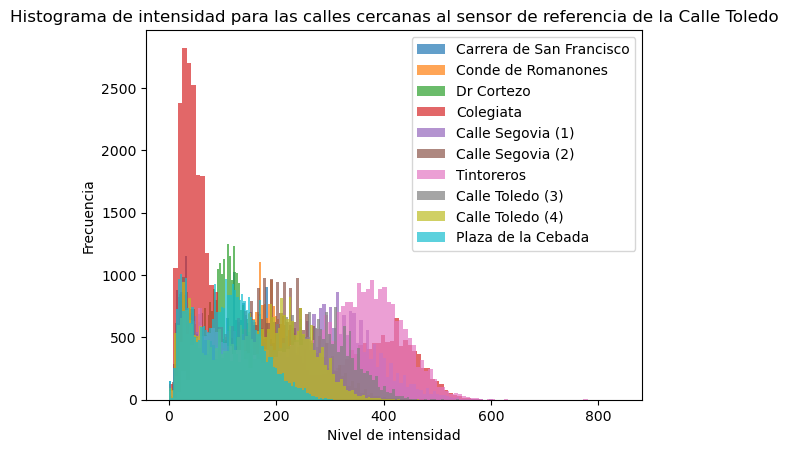

In [3]:
plt.hist(df_total['intensidad_carreraSF_2021.csv'], bins=100, alpha=0.7, label='Carrera de San Francisco')
plt.hist(df_total['intensidad_cCondeR_2021.csv'], bins=100, alpha=0.7, label='Conde de Romanones')
plt.hist(df_total['intensidad_cDoctorC_2021.csv'], bins=100, alpha=0.7, label='Dr Cortezo')
plt.hist(df_total['intensidad_cColegiata_2021.csv'], bins=100, alpha=0.7, label='Colegiata')
plt.hist(df_total['intensidad_cSegovia1_2021.csv'], bins=100, alpha=0.7, label='Calle Segovia (1)')
plt.hist(df_total['intensidad_cSegovia2_2021.csv'], bins=100, alpha=0.7, label='Calle Segovia (2)')
plt.hist(df_total['intensidad_cTintoreros_2021.csv'], bins=100, alpha=0.7, label='Tintoreros')
plt.hist(df_total['intensidad_cToledo3_2021.csv'], bins=100, alpha=0.7, label='Calle Toledo (3)')
plt.hist(df_total['intensidad_cToledo4_2021.csv'], bins=100, alpha=0.7, label='Calle Toledo (4)')
plt.hist(df_total['intensidad_plazaCebada_2021.csv'], bins=100, alpha=0.7, label='Plaza de la Cebada')

plt.title('Histograma de intensidad para las calles cercanas al sensor de referencia de la Calle Toledo')
plt.xlabel('Nivel de intensidad')
plt.ylabel('Frecuencia')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

<Axes: >

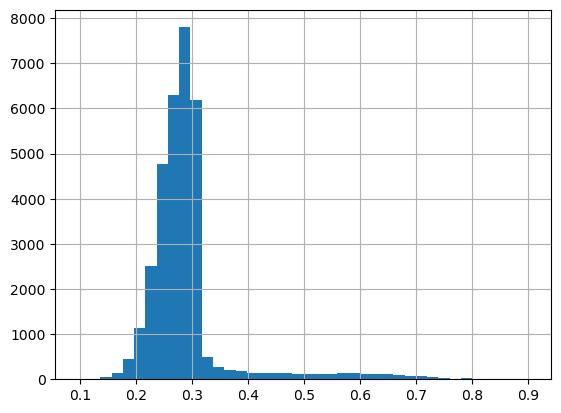

In [3]:
df_total.atasco.hist(bins=40)

## Regresión

#### Primero separamos en train y test

De esta manera usaremos el train para entrenar el modelo meadiante cross validation y luego evaluaremos el resultado con los datos del test

In [19]:
df_total.head(10)

,fecha,atasco,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,...,intensidad_cSegovia2_2021.csv,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv
0,2021-01-01 00:00:00,0.289102,35,1.0,113,2.0,63,2.0,34,2.0,...,20,0.0,90,1.0,48,1.0,72,1.0,45,1.0
1,2021-01-01 00:15:00,0.302008,25,1.0,133,2.0,56,3.0,38,1.0,...,43,1.0,86,4.0,73,2.0,48,2.0,18,1.0
2,2021-01-01 00:30:00,0.299504,25,1.0,176,4.0,96,3.0,47,2.0,...,60,1.0,133,1.0,132,3.0,96,2.0,33,1.0
3,2021-01-01 00:45:00,0.284883,63,1.0,292,5.0,95,3.0,73,4.0,...,88,1.0,316,4.0,83,2.0,116,3.0,42,1.0
4,2021-01-01 01:00:00,0.290016,53,1.0,280,5.0,64,3.0,67,2.0,...,156,4.0,281,3.0,139,3.0,116,5.0,48,1.0
5,2021-01-01 01:15:00,0.267675,108,2.0,323,8.0,140,4.0,77,3.0,...,192,4.0,369,6.0,184,4.0,192,4.0,72,1.0
6,2021-01-01 01:30:00,0.255100,108,4.0,368,9.0,101,5.0,80,3.0,...,112,4.0,305,3.0,145,4.0,203,4.0,77,1.0
7,2021-01-01 01:45:00,0.257466,104,4.0,473,15.0,105,6.0,104,8.0,...,123,4.0,385,6.0,212,5.0,181,3.0,92,4.0
8,2021-01-01 02:00:00,0.262878,76,2.0,276,6.0,99,6.0,97,3.0,...,119,3.0,204,2.0,152,3.0,156,3.0,64,1.0
9,2021-01-01 02:15:00,0.292476,45,1.0,260,5.0,64,3.0,47,2.0,...,48,1.0,196,2.0,67,2.0,104,3.0,64,1.0


In [4]:
from sklearn.model_selection import train_test_split

y_col = "atasco"
X_cols = [c for c in df_total.columns if c!="atasco" and c!="fecha"]
#Elegir para la variable y los valores de la columna atasco
y = df_total[y_col]
#Para las X seleccionar todas las columnas que no sean ni atasco ni fecha
X = df_total[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Prueba con Regresión lineal

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
#Establecer como método LinearRegression, RandomForestRegressor...
metodo = LinearRegression()

#Realizar un for para calcular el accuracy con distintos valores de cv (la estrategia de división de validación cruzada)
for i in range(5,11):
    #Calcular el error con la cross validation de los datos para el training
    res = cross_val_score(metodo, X_train, y_train, cv=i, scoring="neg_mean_absolute_error")
    print("%0.4f NMAE with a standard deviation of %0.4f. Total ammount of divisions %d" % (res.mean(), res.std(), i))

-0.0326 accuracy with a standard deviation of 0.0004. Total ammount of divisions 5
-0.0326 accuracy with a standard deviation of 0.0003. Total ammount of divisions 6
-0.0326 accuracy with a standard deviation of 0.0003. Total ammount of divisions 7
-0.0326 accuracy with a standard deviation of 0.0004. Total ammount of divisions 8
-0.0326 accuracy with a standard deviation of 0.0003. Total ammount of divisions 9
-0.0326 accuracy with a standard deviation of 0.0005. Total ammount of divisions 10


#### Resultado con LinearRegression()

No hay una gran diferencia con la modificación de el cv, pero los resultados parecen buenos:

I think there is a slight misunderstanding in the way you understood neg_mean_absolute_error (NMAE). The way in which neg_mean_absolute_error is computed as follows:

$NMAE=-\frac{\sum_{1}^{N}\left | Y_{i} - Y_{i}^{p} \right |}{N}$

enter image description here

where N is the total number of data points, Y_i is the true value and Y_i^p is the predicted value.

Still we equally penalize the model if it predicts higher or lower than the true value, but it is just that we multiply the final result with -1 just to follow the convention that sklearn has set. So if a model gives you a MAE of say 0.55 and another model gives you a MAE of say 0.78, their NMAE values would be flipped as -0.55 and -0.78 and by following the convention of higher the better, we pick the former model which results has a higher NMAE of -0.55.


(https://stackoverflow.com/questions/62125674/why-is-negative-mse-or-mas-scoring-parameter-like-neg-mean-absolute-error-in)

Esto concluye que el error es muy pequeño ya que -0.0326 se acerca mucho a 0 y la desviación es muy pequeña ([0.0003,0.0009])

### Prueba con Random Forest

In [7]:
#Establecer como método LinearRegression, RandomForestRegressor...
metodo = RandomForestRegressor()

#Calcular el error con la cross validation de los datos para el training
res = cross_val_score(metodo, X_train, y_train, cv=7, scoring="neg_mean_absolute_error")
print("%0.4f accuracy with a standard deviation of %0.4f. Total ammount of divisions %d" % (res.mean(), res.std(), 7))

-0.0280 accuracy with a standard deviation of 0.0008. Total ammount of divisions 7


### Prueba con Regresión de Bayes (BayesianRidge)

In [7]:
#Establecer como método LinearRegression, RandomForestRegressor...
metodo = BayesianRidge()

#Calcular el error con la cross validation de los datos para el training
res = cross_val_score(metodo, X_train, y_train, cv=7, scoring="neg_mean_absolute_error")
print("%0.4f accuracy with a standard deviation of %0.4f. Total ammount of divisions %d" % (res.mean(), res.std(), 7))

-0.0325 accuracy with a standard deviation of 0.0003. Total ammount of divisions 7


### Prueba con Regresor Perceptrón de varias capas (MLPRegressor)

In [8]:
#Establecer como método LinearRegression, RandomForestRegressor...
metodo = MLPRegressor()

#Calcular el error con la cross validation de los datos para el training
res = cross_val_score(metodo, X_train, y_train, cv=7, scoring="neg_mean_absolute_error")
print("%0.4f accuracy with a standard deviation of %0.4f. Total ammount of divisions %d" % (res.mean(), res.std(), 7))

-0.3411 accuracy with a standard deviation of 0.2605. Total ammount of divisions 7


### Prueba con Impulso de gradiente para la regresión (GradientBoostingRegressor)

In [9]:
#Establecer como método LinearRegression, RandomForestRegressor...
metodo = GradientBoostingRegressor()

#Calcular el error con la cross validation de los datos para el training
res = cross_val_score(metodo, X_train, y_train, cv=7, scoring="neg_mean_absolute_error")
print("%0.4f accuracy with a standard deviation of %0.4f. Total ammount of divisions %d" % (res.mean(), res.std(), 7))

-0.0282 accuracy with a standard deviation of 0.0003. Total ammount of divisions 7


#### Parece que Random Forest es la mejor opción

Por lo que vamos a probar ahora a entrenar el modelo y realizar predicciones para ver si realmente tiene un buen rendimiento

In [8]:
metodo = RandomForestRegressor()

y_pred = metodo.fit(X_train,y_train).predict(X_test)

#### Seleccionar un subgrupo para mostrar el gráfico

In [9]:
y_pred_subG=y_pred[:100]
y_test_subG=y_test[:100]

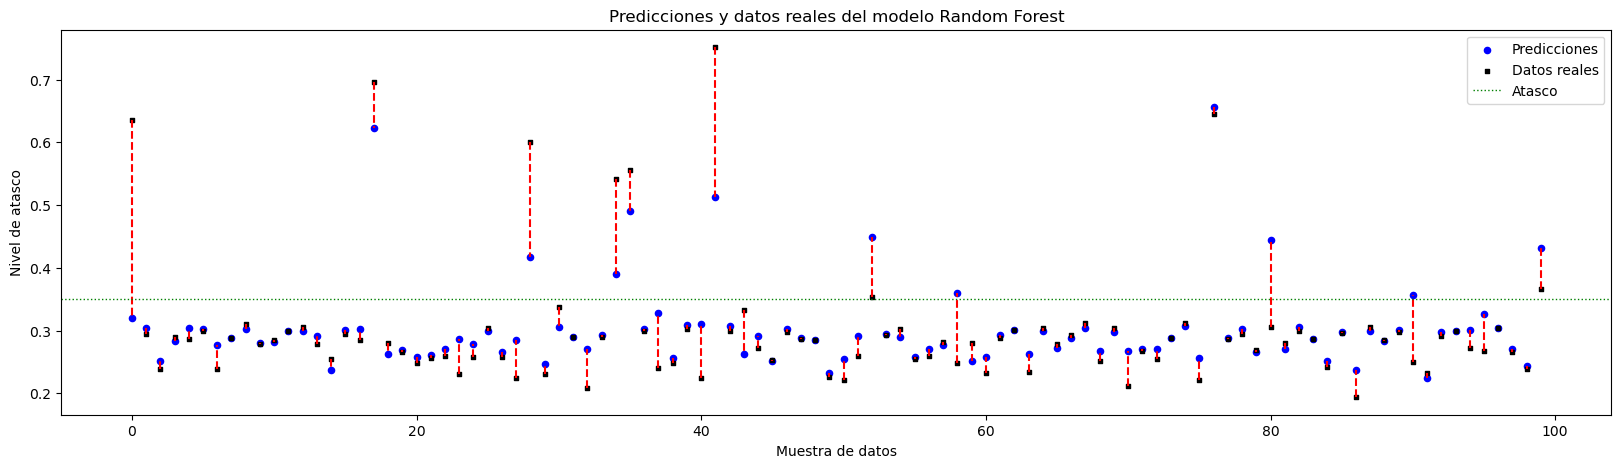

In [10]:
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
x = range(0,len(y_pred_subG))
fig, ax = plt.subplots(figsize=(20, 5))

plt.vlines(x,y_test_subG,y_pred_subG,colors="red",linestyles='dashed')
plt.scatter(x,y_pred_subG,s=20,c="blue",marker="o", label='Predicciones')
plt.scatter(x,y_test_subG,s=10,c="black",marker="s",label='Datos reales')
plt.axhline(y=0.35, color='g', linestyle='dotted',linewidth=1, label='Atasco')

plt.title('Predicciones y datos reales del modelo Random Forest')
plt.xlabel('Muestra de datos')
plt.ylabel('Nivel de atasco')

plt.legend()

plt.show()

Vemos que hay predicciones que se dispersan mucho del dato real. Esto se puede deber a que los datos se abren en cono. Para mirar la imagen, vamos a graficar todos los datos del y de test para ver si esto pasa.

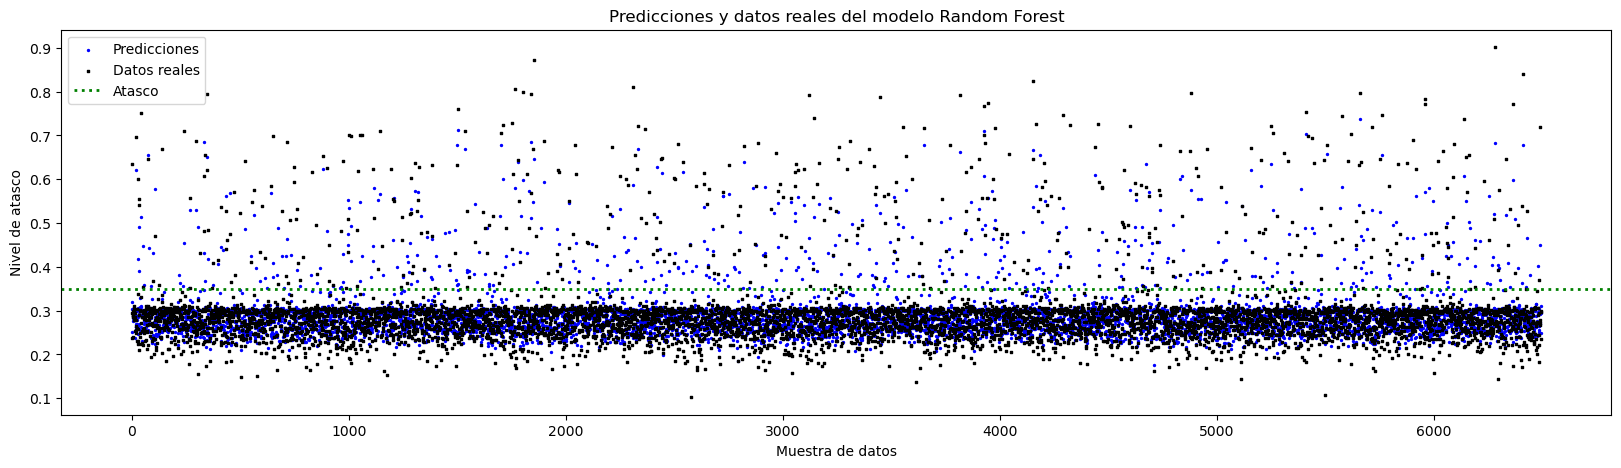

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
x = range(0,len(y_pred))

plt.scatter(x,y_pred,s=2,c="blue",marker="o", label='Predicciones')
plt.scatter(x,y_test,s=1,c="black",marker="s",label='Datos reales')
plt.axhline(y=0.35, color='g', linestyle='dotted',linewidth=2, label='Atasco')

plt.title('Predicciones y datos reales del modelo Random Forest')
plt.xlabel('Muestra de datos')
plt.ylabel('Nivel de atasco')
plt.legend()
plt.show()

problema: heterocedasticidad (se abre en cono no es adecuado para regresión lineal)

## Clasificación

Idea: convertir en 0,1

In [4]:
df2 = df_total.copy()
df2["label"] = df2["atasco"].map(lambda x: 1 if x>0.35 else 0)
df2 = df2.drop(columns=["atasco","fecha"])
df2

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,69,4.0,18,0.0,57,1.0,51,2.0,112,3.0,...,3.0,281,5.0,104,3.0,72,2.0,64,1.0,0
32458,60,2.0,30,0.0,48,1.0,91,4.0,100,3.0,...,2.0,204,7.0,103,3.0,72,2.0,59,1.0,0
32459,48,2.0,42,0.0,88,3.0,77,3.0,136,3.0,...,2.0,236,2.0,92,2.0,72,1.0,64,1.0,0
32460,38,2.0,39,0.0,81,1.0,81,4.0,202,3.0,...,3.0,309,2.0,115,4.0,85,2.0,39,2.0,0


In [5]:
df2.label.value_counts()

0    30011
1     2451
Name: label, dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [8]:
y_col = "label"
X_cols = [c for c in df2.columns if c!=y_col and c!="fecha"]
y = df2[y_col]
X = df2[X_cols]

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

#Establecer el Kappa de Cohen como marcador del rendimiento (valor entre -1 y 1 donde el valor máximo significa acuerdo completo;cero o menos significa acuerdo de azar.)
scorer = make_scorer(cohen_kappa_score)
metodo = LogisticRegression(max_iter=1000)
#StratifieldKFold permite conseguir que las particiones del crosval tengan más o menos la misma cantidad de registros de cada clase
particiones = StratifiedKFold(5,shuffle=True)
res = cross_val_score(metodo, X, y, cv=particiones, scoring=scorer,error_score="raise")
print("Precisión obtenida con Regresión Logística: %0.2f con una desviación estandar de %0.4f" % (res.mean(), res.std()))

C:\Users\jonay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jonay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Precisión obtenida con Regresión Logística: 0.81 con una desviación estandar de 0.0040


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,f1_score, accuracy_score, recall_score,cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import numpy as np


def show_cm(y_real,y_pred):
    labels = list(set(y_real))
    cf_matrix = confusion_matrix(y_real, y_pred, labels=labels)
    ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2', cmap='Blues')
    
def show_results(y_real,y_pred):
    print("Accuracy ",round(accuracy_score(y_real,y_pred),4),\
              "\nRecall ",round(recall_score(y_real,y_pred,average="macro"),4),\
              "\nKappa ", round(cohen_kappa_score(y_real,y_pred),4),)
    print('\nClassification Report: \n', classification_report(y_real, y_pred))
    show_cm(y_real,y_pred)

In [10]:
y_col = "label"
X_cols = [c for c in df2.columns if c!=y_col and c!="fecha"]
y = df2[y_col]
X = df2[X_cols]

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

#Establecer el Kappa de Cohen como marcador del rendimiento (valor entre -1 y 1 donde el valor máximo significa acuerdo completo;cero o menos significa acuerdo de azar.)
scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier()
#StratifieldKFold permite conseguir que las particiones del crosval tengan más o menos la misma cantidad de registros de cada clase
particiones = StratifiedKFold(5,shuffle=True)
res = cross_val_score(metodo, X, y, cv=particiones, scoring=scorer,error_score="raise")
print("Precisión obtenida con clasificador de Arbol de Decisiones: %0.2f con una desviación estandar de %0.4f" % (res.mean(), res.std()))

Precisión obtenida con clasificador de Arbol de Decisiones: 0.89 con una desviación estandar de 0.0034


Antes de realizar el balanceado con SMOTE: Valores sin atasco =  18079 ; Valores con atasco =  1398
Después de realizar el balanceado con SMOTE: Valores sin atasco =  18079 ; Valores con atasco =  18079
Accuracy  0.9097 
Recall  0.753 
Kappa  0.4552

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11932
           1       0.45      0.57      0.50      1053

    accuracy                           0.91     12985
   macro avg       0.71      0.75      0.73     12985
weighted avg       0.92      0.91      0.91     12985



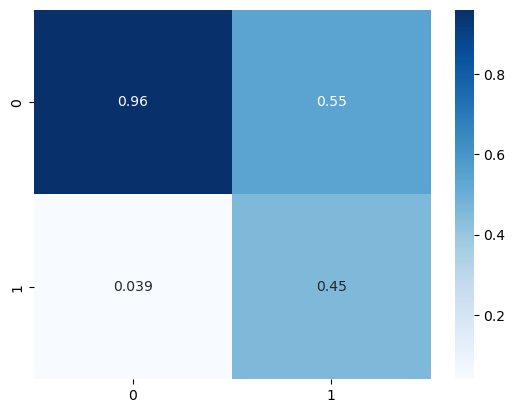

In [11]:
from sklearn.model_selection import train_test_split

#Estandarizador de valores (siguiendo una distribución normal, StandardScaler)
#scaler = StandardScaler()

y_col = "label"
X_cols = [c for c in df2.columns if c!=y_col and c!="fecha"]
y = df2[y_col]
X = df2[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

print("Antes de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

#escalador  = scaler.fit(X_train)
#X_train = escalador.transform(X_train)
#X_test = escalador.transform(X_test)


sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Después de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier() # LogisticRegression(max_iter=10000)

modelo = metodo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)

In [26]:
#Predict probabilities
y_pred_prob = modelo.predict_proba(X_test)
y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Accuracy  0.9113 
Recall  0.7642 
Kappa  0.4575

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11989
           1       0.44      0.59      0.51       996

    accuracy                           0.91     12985
   macro avg       0.70      0.76      0.73     12985
weighted avg       0.92      0.91      0.92     12985



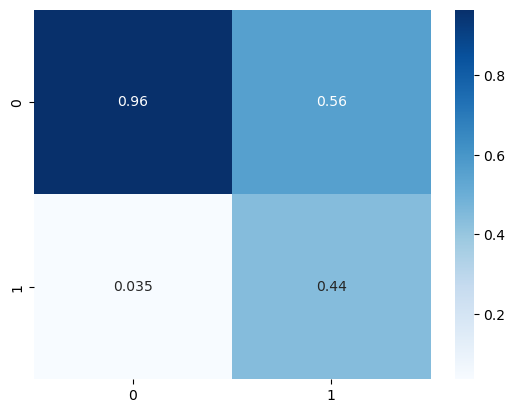

In [27]:
y_pred2 = [1 if a >0.35 else 0 for _,a in y_pred_prob]

show_results(y_test,y_pred2)

### Shift de los datos

En esta parte vamos a intentar predecir con cierta "antelación" si habrá atasco o no. Es decir, vamos a desplazar los datos para que el modelo no prediga si habrá atasco o no con los datos del momento actual sino con los anteriores. De esta manera por cada shift que hagamos nos moveremos 15 minutos en el tiempo

In [151]:
df3 = df_total.copy()
df3["label"] = df3["atasco"].map(lambda x: 1 if x>0.35 else 0)
df3 = df3.drop(columns=["atasco","fecha"])
df3

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,69,4.0,18,0.0,57,1.0,51,2.0,112,3.0,...,3.0,281,5.0,104,3.0,72,2.0,64,1.0,0
32458,60,2.0,30,0.0,48,1.0,91,4.0,100,3.0,...,2.0,204,7.0,103,3.0,72,2.0,59,1.0,0
32459,48,2.0,42,0.0,88,3.0,77,3.0,136,3.0,...,2.0,236,2.0,92,2.0,72,1.0,64,1.0,0
32460,38,2.0,39,0.0,81,1.0,81,4.0,202,3.0,...,3.0,309,2.0,115,4.0,85,2.0,39,2.0,0


#### Shift de datos de 15 minutos

In [152]:
df_ShiftTest_15m=df3
df_ShiftTest_15m['label'] = df_ShiftTest_15m['label'].shift(-1)
df_ShiftTest_15m.drop(df_ShiftTest_15m.tail(1).index,inplace=True)# drop last row

In [153]:
df_ShiftTest_15m

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0.0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0.0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0.0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0.0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32456,61,1.0,43,1.0,77,7.0,48,2.0,87,3.0,...,3.0,232,2.0,128,3.0,73,11.0,64,3.0,0.0
32457,69,4.0,18,0.0,57,1.0,51,2.0,112,3.0,...,3.0,281,5.0,104,3.0,72,2.0,64,1.0,0.0
32458,60,2.0,30,0.0,48,1.0,91,4.0,100,3.0,...,2.0,204,7.0,103,3.0,72,2.0,59,1.0,0.0
32459,48,2.0,42,0.0,88,3.0,77,3.0,136,3.0,...,2.0,236,2.0,92,2.0,72,1.0,64,1.0,0.0


In [154]:
df_ShiftTest_15m.isna().count()

intensidad_carreraSF_2021.csv      32461
ocupacion_carreraSF_2021.csv       32461
intensidad_cColegiata_2021.csv     32461
ocupacion_cColegiata_2021.csv      32461
intensidad_cCondeR_2021.csv        32461
ocupacion_cCondeR_2021.csv         32461
intensidad_cDoctorC_2021.csv       32461
ocupacion_cDoctorC_2021.csv        32461
intensidad_cSegovia1_2021.csv      32461
ocupacion_cSegovia1_2021.csv       32461
intensidad_cSegovia2_2021.csv      32461
ocupacion_cSegovia2_2021.csv       32461
intensidad_cTintoreros_2021.csv    32461
ocupacion_cTintoreros_2021.csv     32461
intensidad_cToledo3_2021.csv       32461
ocupacion_cToledo3_2021.csv        32461
intensidad_cToledo4_2021.csv       32461
ocupacion_cToledo4_2021.csv        32461
intensidad_plazaCebada_2021.csv    32461
ocupacion_plazaCebada_2021.csv     32461
label                              32461
dtype: int64

Antes de realizar el balanceado con SMOTE: Valores sin atasco =  18018 ; Valores con atasco =  1458
Después de realizar el balanceado con SMOTE: Valores sin atasco =  18018 ; Valores con atasco =  18018
Accuracy  0.9128 
Recall  0.745 
Kappa  0.4425

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     11992
         1.0       0.44      0.55      0.49       993

    accuracy                           0.91     12985
   macro avg       0.70      0.74      0.72     12985
weighted avg       0.92      0.91      0.92     12985



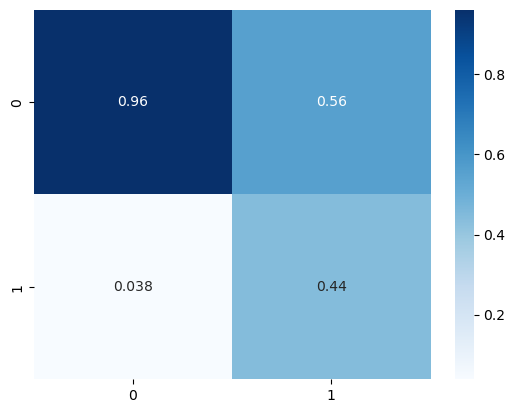

In [155]:
#Estandarizador de valores (siguiendo una distribución normal, StandardScaler)
scaler = StandardScaler()

y_col = "label"
X_cols = [c for c in df_ShiftTest_15m.columns if c!=y_col and c!="fecha"]
y = df_ShiftTest_15m[y_col]
X = df_ShiftTest_15m[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

print("Antes de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

escalador  = scaler.fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)


sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Después de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier() # LogisticRegression(max_iter=10000)

modelo = metodo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)

#### Shift de datos de 30 minutos

In [156]:
df_ShiftTest_30m=df3
df_ShiftTest_30m['label'] = df_ShiftTest_30m['label'].shift(-2)

In [157]:
df_ShiftTest_30m

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0.0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0.0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0.0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0.0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32456,61,1.0,43,1.0,77,7.0,48,2.0,87,3.0,...,3.0,232,2.0,128,3.0,73,11.0,64,3.0,0.0
32457,69,4.0,18,0.0,57,1.0,51,2.0,112,3.0,...,3.0,281,5.0,104,3.0,72,2.0,64,1.0,0.0
32458,60,2.0,30,0.0,48,1.0,91,4.0,100,3.0,...,2.0,204,7.0,103,3.0,72,2.0,59,1.0,0.0
32459,48,2.0,42,0.0,88,3.0,77,3.0,136,3.0,...,2.0,236,2.0,92,2.0,72,1.0,64,1.0,NaN


In [158]:
df_ShiftTest_30m.drop(df_ShiftTest_30m.tail(2).index,inplace=True)# drop last 2 rows

In [159]:
df_ShiftTest_30m

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0.0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0.0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0.0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0.0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32454,61,1.0,56,1.0,120,8.0,59,2.0,168,5.0,...,4.0,384,9.0,140,5.0,127,4.0,64,2.0,0.0
32455,59,3.0,36,1.0,76,4.0,81,4.0,116,2.0,...,2.0,260,4.0,124,4.0,101,9.0,57,1.0,0.0
32456,61,1.0,43,1.0,77,7.0,48,2.0,87,3.0,...,3.0,232,2.0,128,3.0,73,11.0,64,3.0,0.0
32457,69,4.0,18,0.0,57,1.0,51,2.0,112,3.0,...,3.0,281,5.0,104,3.0,72,2.0,64,1.0,0.0


Antes de realizar el balanceado con SMOTE: Valores sin atasco =  18000 ; Valores con atasco =  1475
Después de realizar el balanceado con SMOTE: Valores sin atasco =  18000 ; Valores con atasco =  18000
Accuracy  0.8854 
Recall  0.6702 
Kappa  0.2923

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     12008
         1.0       0.31      0.42      0.35       976

    accuracy                           0.89     12984
   macro avg       0.63      0.67      0.65     12984
weighted avg       0.90      0.89      0.89     12984



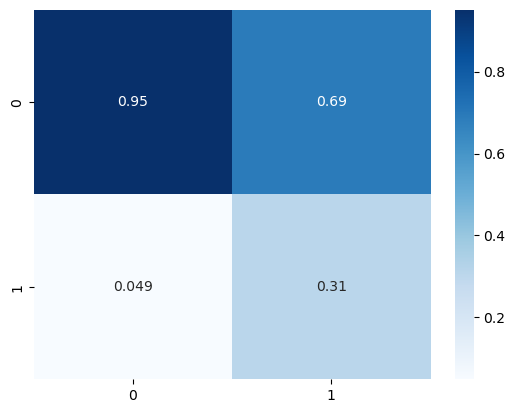

In [160]:
#Estandarizador de valores (siguiendo una distribución normal, StandardScaler)
scaler = StandardScaler()

y_col = "label"
X_cols = [c for c in df_ShiftTest_30m.columns if c!=y_col and c!="fecha"]
y = df_ShiftTest_30m[y_col]
X = df_ShiftTest_30m[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

print("Antes de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

escalador  = scaler.fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)


sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Después de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier() # LogisticRegression(max_iter=10000)

modelo = metodo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)

#### Shift de datos de 45 minutos

In [161]:
df_ShiftTest_45m=df3
df_ShiftTest_45m['label'] = df_ShiftTest_45m['label'].shift(-3)
df_ShiftTest_45m.drop(df_ShiftTest_45m.tail(3).index,inplace=True)# drop last 3 rows

In [162]:
df_ShiftTest_45m

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0.0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0.0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0.0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0.0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32451,76,1.0,48,0.0,80,4.0,52,2.0,220,5.0,...,5.0,332,8.0,160,6.0,168,6.0,67,3.0,0.0
32452,96,2.0,23,0.0,92,3.0,52,6.0,204,5.0,...,3.0,315,5.0,140,3.0,127,4.0,116,3.0,0.0
32453,80,1.0,60,0.0,60,3.0,56,3.0,147,4.0,...,2.0,300,5.0,156,5.0,132,4.0,87,2.0,0.0
32454,61,1.0,56,1.0,120,8.0,59,2.0,168,5.0,...,4.0,384,9.0,140,5.0,127,4.0,64,2.0,0.0


Antes de realizar el balanceado con SMOTE: Valores sin atasco =  18003 ; Valores con atasco =  1470
Después de realizar el balanceado con SMOTE: Valores sin atasco =  18003 ; Valores con atasco =  18003
Accuracy  0.8804 
Recall  0.6409 
Kappa  0.2476

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     12002
         1.0       0.28      0.36      0.31       981

    accuracy                           0.88     12983
   macro avg       0.61      0.64      0.62     12983
weighted avg       0.90      0.88      0.89     12983



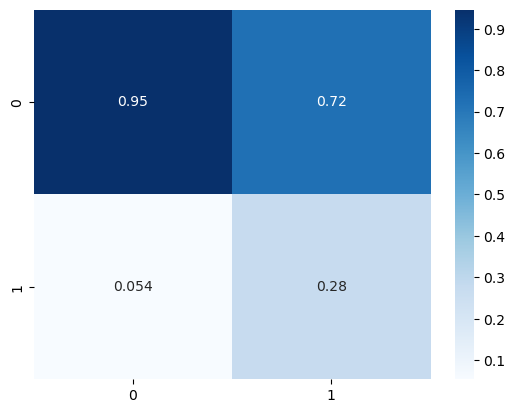

In [163]:
#Estandarizador de valores (siguiendo una distribución normal, StandardScaler)
scaler = StandardScaler()

y_col = "label"
X_cols = [c for c in df_ShiftTest_45m.columns if c!=y_col and c!="fecha"]
y = df_ShiftTest_45m[y_col]
X = df_ShiftTest_45m[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

print("Antes de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

escalador  = scaler.fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)


sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Después de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier() # LogisticRegression(max_iter=10000)

modelo = metodo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)

#### Shift de datos de 1 hora

In [164]:
df_ShiftTest_1h=df3
df_ShiftTest_1h['label'] = df_ShiftTest_1h['label'].shift(-4)
df_ShiftTest_1h.drop(df_ShiftTest_1h.tail(4).index,inplace=True)# drop last 4 rows

In [165]:
df_ShiftTest_1h

,intensidad_carreraSF_2021.csv,ocupacion_carreraSF_2021.csv,intensidad_cColegiata_2021.csv,ocupacion_cColegiata_2021.csv,intensidad_cCondeR_2021.csv,ocupacion_cCondeR_2021.csv,intensidad_cDoctorC_2021.csv,ocupacion_cDoctorC_2021.csv,intensidad_cSegovia1_2021.csv,ocupacion_cSegovia1_2021.csv,...,ocupacion_cSegovia2_2021.csv,intensidad_cTintoreros_2021.csv,ocupacion_cTintoreros_2021.csv,intensidad_cToledo3_2021.csv,ocupacion_cToledo3_2021.csv,intensidad_cToledo4_2021.csv,ocupacion_cToledo4_2021.csv,intensidad_plazaCebada_2021.csv,ocupacion_plazaCebada_2021.csv,label
0,35,1.0,113,2.0,63,2.0,34,2.0,40,1.0,...,0.0,90,1.0,48,1.0,72,1.0,45,1.0,0.0
1,25,1.0,133,2.0,56,3.0,38,1.0,36,0.0,...,1.0,86,4.0,73,2.0,48,2.0,18,1.0,0.0
2,25,1.0,176,4.0,96,3.0,47,2.0,52,1.0,...,1.0,133,1.0,132,3.0,96,2.0,33,1.0,0.0
3,63,1.0,292,5.0,95,3.0,73,4.0,228,5.0,...,1.0,316,4.0,83,2.0,116,3.0,42,1.0,0.0
4,53,1.0,280,5.0,64,3.0,67,2.0,200,4.0,...,4.0,281,3.0,139,3.0,116,5.0,48,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32447,124,4.0,37,0.0,48,2.0,77,6.0,204,6.0,...,3.0,252,4.0,189,5.0,268,6.0,72,2.0,0.0
32448,159,3.0,56,1.0,64,3.0,96,3.0,237,6.0,...,5.0,301,4.0,169,5.0,268,6.0,80,2.0,0.0
32449,116,4.0,47,0.0,77,2.0,77,2.0,228,5.0,...,5.0,300,4.0,192,5.0,168,4.0,53,2.0,0.0
32450,80,2.0,67,0.0,76,2.0,92,7.0,248,8.0,...,5.0,460,9.0,160,6.0,149,4.0,87,3.0,0.0


Antes de realizar el balanceado con SMOTE: Valores sin atasco =  17955 ; Valores con atasco =  1516
Después de realizar el balanceado con SMOTE: Valores sin atasco =  17955 ; Valores con atasco =  17955
Accuracy  0.8688 
Recall  0.6368 
Kappa  0.218

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     12046
         1.0       0.24      0.37      0.29       935

    accuracy                           0.87     12981
   macro avg       0.59      0.64      0.61     12981
weighted avg       0.90      0.87      0.88     12981



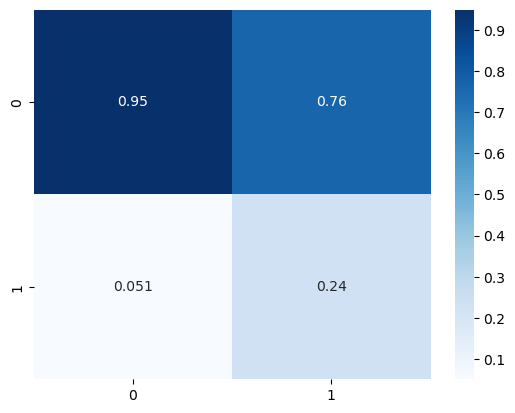

In [166]:
#Estandarizador de valores (siguiendo una distribución normal, StandardScaler)
scaler = StandardScaler()

y_col = "label"
X_cols = [c for c in df_ShiftTest_1h.columns if c!=y_col and c!="fecha"]
y = df_ShiftTest_1h[y_col]
X = df_ShiftTest_1h[X_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

print("Antes de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

escalador  = scaler.fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)


sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Después de realizar el balanceado con SMOTE: Valores sin atasco = ",(y_train==0).sum(),"; Valores con atasco = ",(y_train==1).sum())

scorer = make_scorer(cohen_kappa_score)
metodo = DecisionTreeClassifier() # LogisticRegression(max_iter=10000)

modelo = metodo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)